In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df = pd.read_csv("qonto_loans.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE
0,182940,0,Cash loans,F,N,N,0,90000.0,835380.0,23571.0,675000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.019689
1,397049,1,Cash loans,M,Y,Y,0,225000.0,254700.0,20250.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018029
2,120845,1,Cash loans,M,Y,Y,3,135000.0,755190.0,38686.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.025164
3,155211,0,Revolving loans,M,N,N,2,180000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007305
4,172542,0,Cash loans,M,N,Y,0,270000.0,781920.0,33129.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,387776,0,Cash loans,F,N,Y,0,135000.0,124380.0,12244.5,112500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Widow,House / apartment,0.035792
9996,418846,1,Cash loans,M,Y,Y,1,270000.0,384048.0,18031.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.011657
9997,113732,0,Revolving loans,F,N,Y,0,270000.0,315000.0,15750.0,315000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.007020
9998,136141,0,Cash loans,M,Y,N,1,180000.0,454500.0,16695.0,454500.0,Other_B,Working,Secondary / secondary special,Married,House / apartment,0.028663


In [112]:
df_mean = df.mean(numeric_only=True)
df_mean

SK_ID_CURR                    278434.555600
TARGET                             0.077500
CNT_CHILDREN                       0.419200
AMT_INCOME_TOTAL              167780.011693
AMT_CREDIT                    603476.101800
AMT_ANNUITY                    26909.101710
AMT_GOODS_PRICE               541461.026708
REGION_POPULATION_RELATIVE         0.021051
dtype: float64

<AxesSubplot:xlabel='TARGET', ylabel='Count'>

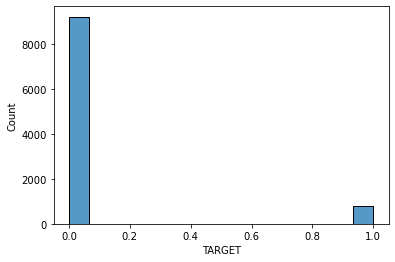

In [113]:
sns.histplot(data=df, x='TARGET')

H0 = Default rate >= 8.5 %
H1 = Default rate < 8.5 %

In [114]:
mu = 0.085
sample_avg = df['TARGET'].mean()
sample_std = df['TARGET'].std()
n = df.shape[0]

print(f"{mu=}\n{sample_avg=}\n{sample_std=}\n{n=}")

mu=0.085
sample_avg=0.0775
sample_std=0.2673965222100235
n=10000


In [115]:
distance = sample_avg - mu
standard_error = sample_std / np.sqrt(n)

z_score = distance / standard_error
z_score

-2.804823315581202

In [116]:
alpha = 0.05

In [117]:
from statsmodels.stats.weightstats import ztest

_, p_value = ztest(x1=df['TARGET'], value=mu, alternative='smaller')
p_value * 100

0.25172084065654854

In [118]:
if p_value < alpha:
  print('Null hypothesis rejected, alternative accepted.')
else:
  print('Test inconclusive, we cannot reject the null hypothesis.')

Null hypothesis rejected, alternative accepted.


In [119]:
from scipy.stats import norm

norm.cdf(-2.8)

0.002555130330427932